In [17]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# read in the iris data
iris = load_iris()
# create X (features) and y (response)
X = iris.data 
y = iris.target

In [19]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5) 
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') 
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [20]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


In [21]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31)) 
k_scores = [] 
for k in k_range:     
    knn = KNeighborsClassifier(n_neighbors=k)     
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')     
    k_scores.append(scores.mean()) 
print(k_scores)

[0.96000000000000019, 0.95333333333333348, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96000000000000019, 0.96666666666666679, 0.96000000000000019, 0.96666666666666679, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


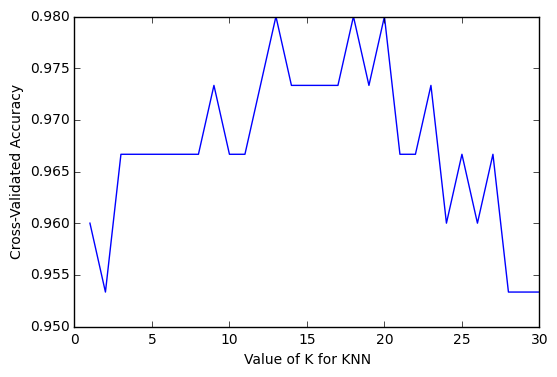

In [22]:
# plot the value of K for KNN (x-axis) versus the cross-validated accura cy (y-axis)
plt.plot(k_range, k_scores) 
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### More eﬃcient parameter tuning usingGridSearchCV
Allows you to deﬁne a grid of parameters
grid of parameters that will be searched
searched using
K-fold cross-validation

In [23]:
from sklearn.model_selection import GridSearchCV

In [25]:
# define the parameter values that should be searched
k_range = list(range(1, 31)) 
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [27]:
# create a parameter grid: map the parameter names to the values that sh ould be searched
param_grid = dict(n_neighbors=k_range) 
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [29]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs = -1)

In [30]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [32]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([ 0.00117733,  0.00039442,  0.00036483,  0.00035522,  0.00037055,
         0.00035203,  0.00039613,  0.00046103,  0.00038931,  0.00038292,
         0.00038457,  0.00039384,  0.00043895,  0.00039575,  0.0004071 ,
         0.00038841,  0.00057788,  0.00048127,  0.000597  ,  0.00049305,
         0.00047984,  0.00037394,  0.00038764,  0.00038414,  0.00043838,
         0.00039823,  0.00040245,  0.00038781,  0.00047457,  0.00048087]),
 'mean_score_time': array([ 0.00083196,  0.00070765,  0.00069199,  0.00068285,  0.0007113 ,
         0.00144997,  0.00192804,  0.00084536,  0.00073349,  0.00071988,
         0.00074863,  0.00083718,  0.0007607 ,  0.0008095 ,  0.00085282,
         0.00080187,  0.00099747,  0.00114822,  0.00092301,  0.00095878,
         0.00092289,  0.00072603,  0.00075991,  0.0008467 ,  0.00087903,
         0.00079629,  0.00082896,  0.00085909,  0.00101423,  0.00096011]),
 'mean_test_score': array([ 0.96      ,  0.95333333,  0.96666667,  0.96666667,  0.96

In [38]:
# examine the first tuple
print(grid.grid_scores_[0].parameters) 
print(grid.grid_scores_[0].cv_validation_scores) 
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [40]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_] 
print(grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


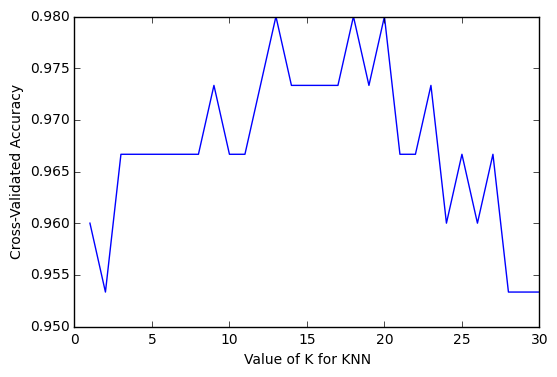

In [41]:
# plot the results
plt.plot(k_range, grid_mean_scores) 
plt.xlabel('Value of K for KNN') 
plt.ylabel('Cross-Validated Accuracy')

In [42]:
# examine the best model
print(grid.best_score_) 
print(grid.best_params_) 
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously

In [44]:
# define the parameter values that should be searched
k_range = list(range(1, 31)) 
weight_options = ['uniform', 'distance']

In [45]:
# create a parameter grid: map the parameter names to the values that sh ould be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options) 
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [46]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy') 
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [47]:
# view the complete results
grid.grid_scores_

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [49]:
# examine the best model
print(grid.best_score_) 
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


### Using the best parameters to make predictions

In [51]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform') 
knn.fit(X, y)
# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

In [52]:
# shortcut: GridSearchCV automatically refits the best model using all o f the data
grid.predict([[3, 5, 4, 2]])

array([1])

###  Reducing computational expense using RandomizedSearchCV

In [53]:
from sklearn.grid_search import RandomizedSearchCV

In [54]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [57]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5) 
rand.fit(X, y) 
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16, 'weights': 'distance'},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 22, 'weights': 'uniform'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 18, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 27, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 29, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 10, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 22, 'weights': 'distance'},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14, 'weights': 'uniform'},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 12, 'weights': 'distance'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15, 'weights': 'uniform'}]

In [59]:
# examine the best model
print(rand.best_score_) 
print(rand.best_params_)

0.98
{'n_neighbors': 18, 'weights': 'uniform'}


In [61]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best s core
best_scores = [] 
for _ in range(20):     
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy' , n_iter=10)     
    rand.fit(X, y)     
    best_scores.append(round(rand.best_score_, 3)) 
print(best_scores)

[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.973, 0.98]
